In [1]:
import pandas as pd
import datetime
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"
import kaleido

control_data = pd.read_csv("control_group.csv")
test_data = pd.read_csv("test_group.csv")

In [2]:
control_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
test_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [4]:
#Data Preparation
#Rename all the columns
control_data.columns = ["Campaign Name", "Date", "Amount Spent", 
                        "Number of Impressions", "Reach", "Website Clicks", 
                        "Searches Received", "Content Viewed", "Added to Cart",
                        "Purchases"]

In [5]:
control_data.head()

,Campaign Name,Date,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
test_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [7]:
test_data.columns = ["Campaign Name", "Date", "Amount Spent", 
                        "Number of Impressions", "Reach", "Website Clicks", 
                        "Searches Received", "Content Viewed", "Added to Cart",
                        "Purchases"]

In [8]:
test_data.head()

,Campaign Name,Date,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [9]:
print(control_data.isnull().sum())

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    1
Reach                    1
Website Clicks           1
Searches Received        1
Content Viewed           1
Added to Cart            1
Purchases                1
dtype: int64


In [10]:
print(test_data.isnull().sum())

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    0
Reach                    0
Website Clicks           0
Searches Received        0
Content Viewed           0
Added to Cart            0
Purchases                0
dtype: int64


In [12]:
control_data["Number of Impressions"].fillna(value=control_data["Number of Impressions"].mean(), inplace=True)

In [14]:
control_data["Reach"].fillna(value=control_data["Reach"].mean(), inplace=True)

In [15]:
control_data["Website Clicks"].fillna(value=control_data["Website Clicks"].mean(), inplace=True)

In [16]:
control_data["Searches Received"].fillna(value=control_data["Searches Received"].mean(), inplace=True)

control_data["Content Viewed"].fillna(value=control_data["Content Viewed"].mean(), inplace=True)

control_data["Added to Cart"].fillna(value=control_data["Added to Cart"].mean(), inplace=True)

control_data["Purchases"].fillna(value=control_data["Purchases"].mean(), inplace=True)

In [17]:
print(control_data.isnull().sum())

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    0
Reach                    0
Website Clicks           0
Searches Received        0
Content Viewed           0
Added to Cart            0
Purchases                0
dtype: int64


In [18]:
#Now I will create a new dataset by merging both datasets:
ab_data = control_data.merge(test_data,
                            how="outer").sort_values(["Date"])
ab_data = ab_data.reset_index(drop=True)
print(ab_data.head())

C:\Users\USER\AppData\Local\Temp\ipykernel_11372\1844744872.py:2: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  ab_data = control_data.merge(test_data,


      Campaign Name        Date  Amount Spent  Number of Impressions    Reach  \
0  Control Campaign   1.08.2019          2280                82702.0  56930.0   
1     Test Campaign   1.08.2019          3008                39550.0  35820.0   
2     Test Campaign  10.08.2019          2790                95054.0  79632.0   
3  Control Campaign  10.08.2019          2149               117624.0  91257.0   
4     Test Campaign  11.08.2019          2420                83633.0  71286.0   

   Website Clicks  Searches Received  Content Viewed  Added to Cart  Purchases  
0          7016.0             2290.0          2159.0         1819.0      618.0  
1          3038.0             1946.0          1069.0          894.0      255.0  
2          8125.0             2312.0          1804.0          424.0      275.0  
3          2277.0             2475.0          1984.0         1629.0      734.0  
4          3750.0             2893.0          2617.0         1075.0      668.0  


In [19]:
print(ab_data["Campaign Name"].value_counts())

Control Campaign    30
Test Campaign       30
Name: Campaign Name, dtype: int64


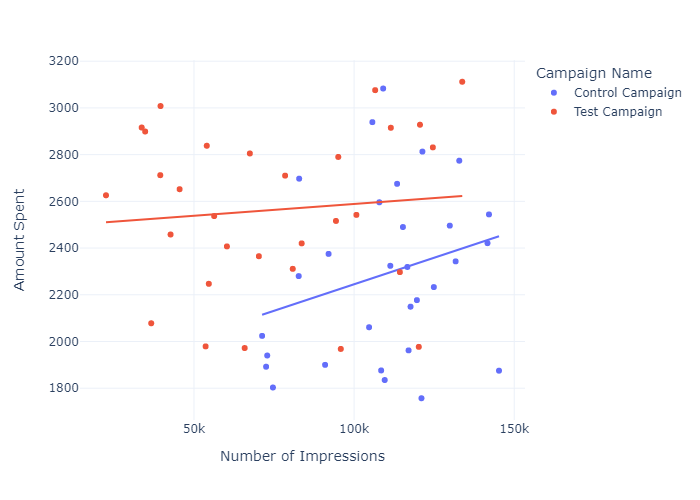

In [20]:
figure = px.scatter(ab_data, x="Number of Impressions", y="Amount Spent",
                   color="Campaign Name", trendline="ols")
figure.show("png")
#The control campaign resulted in more impressions according to
#the amount spent on both campaigns

In [21]:
ab_data.head()

,Campaign Name,Date,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Test Campaign,1.08.2019,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0
2,Test Campaign,10.08.2019,2790,95054.0,79632.0,8125.0,2312.0,1804.0,424.0,275.0
3,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0
4,Test Campaign,11.08.2019,2420,83633.0,71286.0,3750.0,2893.0,2617.0,1075.0,668.0


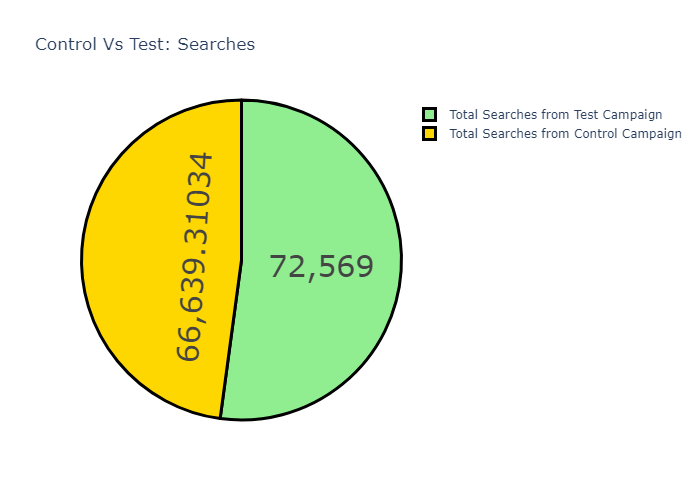

In [23]:
label = ["Total Searches from Control Campaign",
        "Total Searches from Test Campaign"]
counts = [sum(control_data["Searches Received"]),
         sum(test_data["Searches Received"])]
colors= ['gold', 'lightgreen']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])#ploty.graph_objects
fig.update_layout(title_text='Control Vs Test: Searches')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=3)))
fig.show("png")
#The test campaign resulted in more searches on the website.

In [24]:
ab_data.head()

,Campaign Name,Date,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Test Campaign,1.08.2019,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0
2,Test Campaign,10.08.2019,2790,95054.0,79632.0,8125.0,2312.0,1804.0,424.0,275.0
3,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0
4,Test Campaign,11.08.2019,2420,83633.0,71286.0,3750.0,2893.0,2617.0,1075.0,668.0


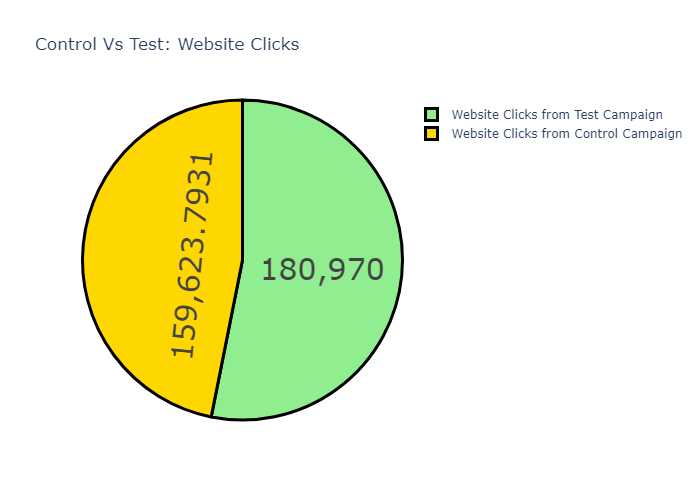

In [25]:
label = ["Website Clicks from Control Campaign",
        "Website Clicks from Test Campaign"]

counts = [sum(control_data["Website Clicks"]),
         sum(test_data["Website Clicks"])]

colors = ['gold', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text="Control Vs Test: Website Clicks")
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=3)))
fig.show("png")
#The test campaign wins in the number of website click

In [26]:
ab_data.head()

,Campaign Name,Date,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Test Campaign,1.08.2019,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0
2,Test Campaign,10.08.2019,2790,95054.0,79632.0,8125.0,2312.0,1804.0,424.0,275.0
3,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0
4,Test Campaign,11.08.2019,2420,83633.0,71286.0,3750.0,2893.0,2617.0,1075.0,668.0


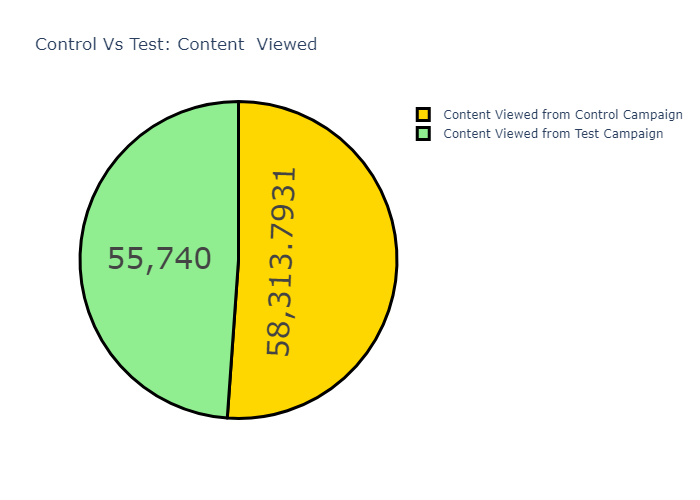

In [27]:
label = ["Content Viewed from Control Campaign",
        "Content Viewed from Test Campaign"]
counts = [sum(control_data["Content Viewed"]),
         sum(test_data["Content Viewed"])]
colors = ['gold', 'lightgreen']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Control Vs Test: Content  Viewed')
fig.update_traces(hoverinfo="label+percent", textinfo="value",
                 textfont_size=30,
                 marker=dict(colors=colors,
                            line=dict(color="black", width=3)))
fig.show("png")
#The audience of the control campaign viewed more content than the test campaign. 
#Although there is not much difference,


In [28]:
ab_data.head()

,Campaign Name,Date,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Test Campaign,1.08.2019,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0
2,Test Campaign,10.08.2019,2790,95054.0,79632.0,8125.0,2312.0,1804.0,424.0,275.0
3,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0
4,Test Campaign,11.08.2019,2420,83633.0,71286.0,3750.0,2893.0,2617.0,1075.0,668.0


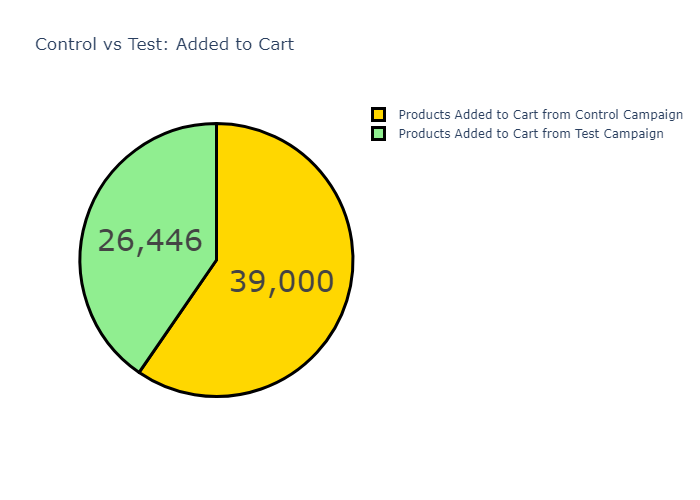

In [30]:
label = ["Products Added to Cart from Control Campaign",
        "Products Added to Cart from Test Campaign"]
counts = [sum(control_data["Added to Cart"]),
         sum(test_data["Added to Cart"])]
colors = ["gold", 'lightgreen']
fig = go.Figure(data=[go.Pie(labels= label, values = counts)])
fig.update_layout(title_text='Control vs Test: Added to Cart')
fig.update_traces(hoverinfo="label+percent", textinfo="value",
                 textfont_size=30,
                 marker=dict(colors=colors,
                            line=dict(color="black", width=3)))
fig.show("png")
#Despite low website clicks more products were added to the cart from 
#the control campaign

In [31]:
ab_data.head()

,Campaign Name,Date,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Test Campaign,1.08.2019,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0
2,Test Campaign,10.08.2019,2790,95054.0,79632.0,8125.0,2312.0,1804.0,424.0,275.0
3,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0
4,Test Campaign,11.08.2019,2420,83633.0,71286.0,3750.0,2893.0,2617.0,1075.0,668.0


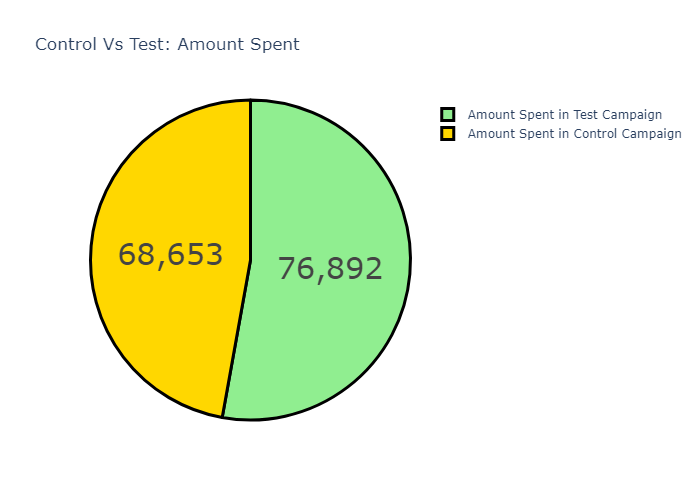

In [34]:
label = ["Amount Spent in Control Campaign", 
         "Amount Spent in Test Campaign"]
counts = [sum(control_data["Amount Spent"]), 
          sum(test_data["Amount Spent"])]
colors = ['gold','lightgreen']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Control Vs Test: Amount Spent')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=3)))
fig.show("png")
#The amount spent on the test campaign is higher than the control campaign

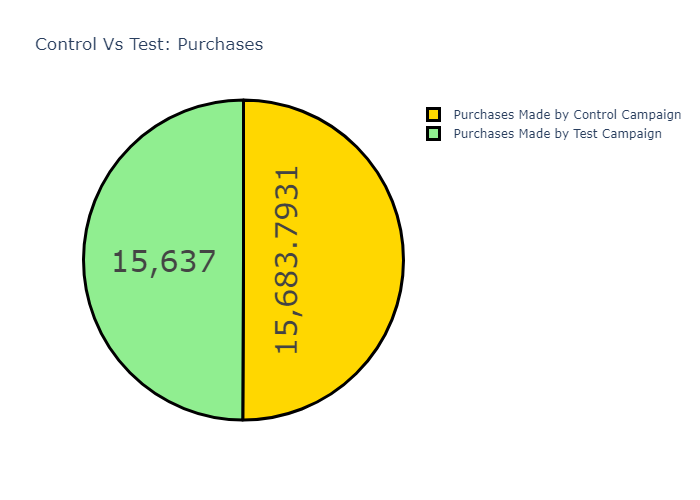

In [39]:
label = ["Purchases Made by Control Campaign", 
         "Purchases Made by Test Campaign"]
counts = [sum(control_data["Purchases"]), 
          sum(test_data["Purchases"])]
colors = ['gold','lightgreen']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Control Vs Test: Purchases')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=3)))
fig.show("png")
#There’s only a difference of around 1% in the purchases made from both ad campaigns

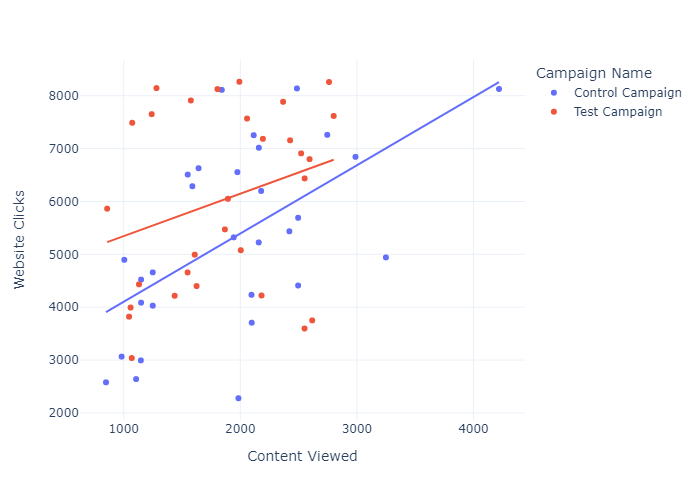

In [41]:
figure = px.scatter(ab_data, 
                    x="Content Viewed",
                    y="Website Clicks",  
                    color= "Campaign Name", 
                    trendline="ols")
figure.show("png")
#The website clicks are higher in the test campaign,
#but the engagement from website clicks is higher in the control campaign.

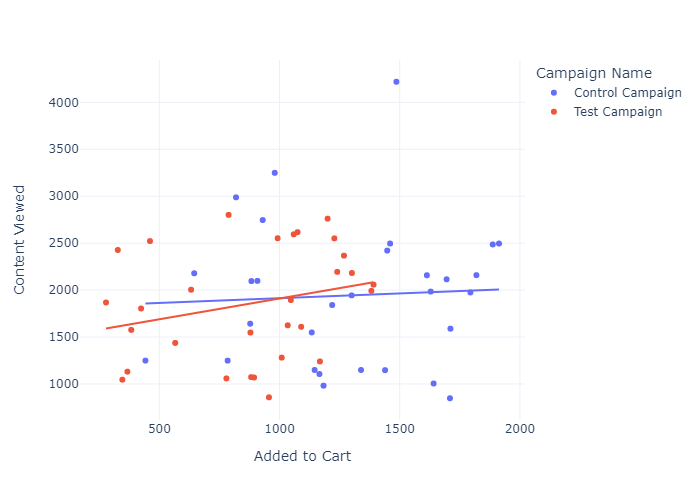

In [42]:
figure = px.scatter(data_frame = ab_data, 
                    x="Added to Cart",
                    y="Content Viewed",  
                    color= "Campaign Name", 
                    trendline="ols")
figure.show("png")

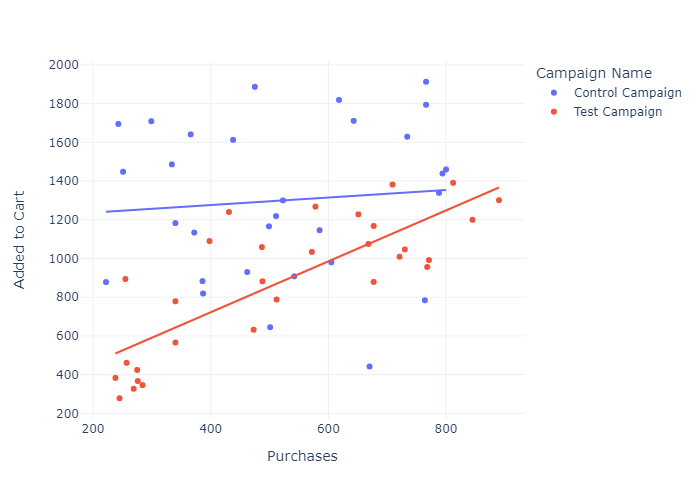

In [43]:
figure = px.scatter(ab_data, 
                    x="Purchases",
                    y="Added to Cart", 
                    color= "Campaign Name", 
                    trendline="ols")
figure.show("png")
#Although the control campaign resulted in more sales and more products in the cart, 
#the conversation rate of the test campaign is higher.
